<a href="https://colab.research.google.com/github/JjembaRonald/Python-Projects/blob/main/fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Check for missing Values and add them
Date      0
ISP       0
Amount    3
dtype: int64

Checking/Verifying data types for columns
Date       object
ISP        object
Amount    float64
dtype: object

First 12 rows
                     Date         ISP    Amount Category
Transanction_ID                                         
1                15-02-25         MTN  122958.0   Medium
2                17-02-25        Wave  147867.0   Medium
3                17-02-25  LycaMobile  132932.0   Medium
4                21-02-25        Wave  260178.0     High
5                11-03-25        Wave  120879.0   Medium
6                05-03-25   yo Uganda       NaN      Low
7                03-03-25  LycaMobile  208892.0     High
8                24-02-25        Wave   55886.0   Medium
9                26-02-25      Airtel  138337.0   Medium
10               20-02-25        Wave       NaN      Low
11               05-03-25  LycaMobile  176203.0     High
12               21-02-25         MTN  192335

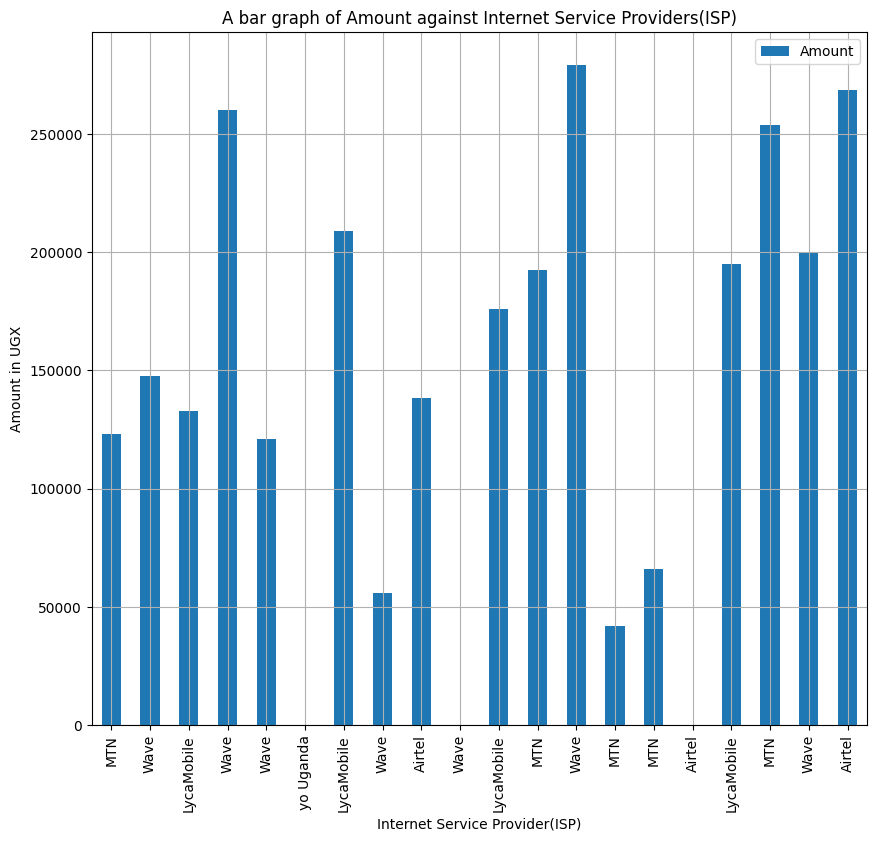


Bargraph plotting Amount against grouped ISP


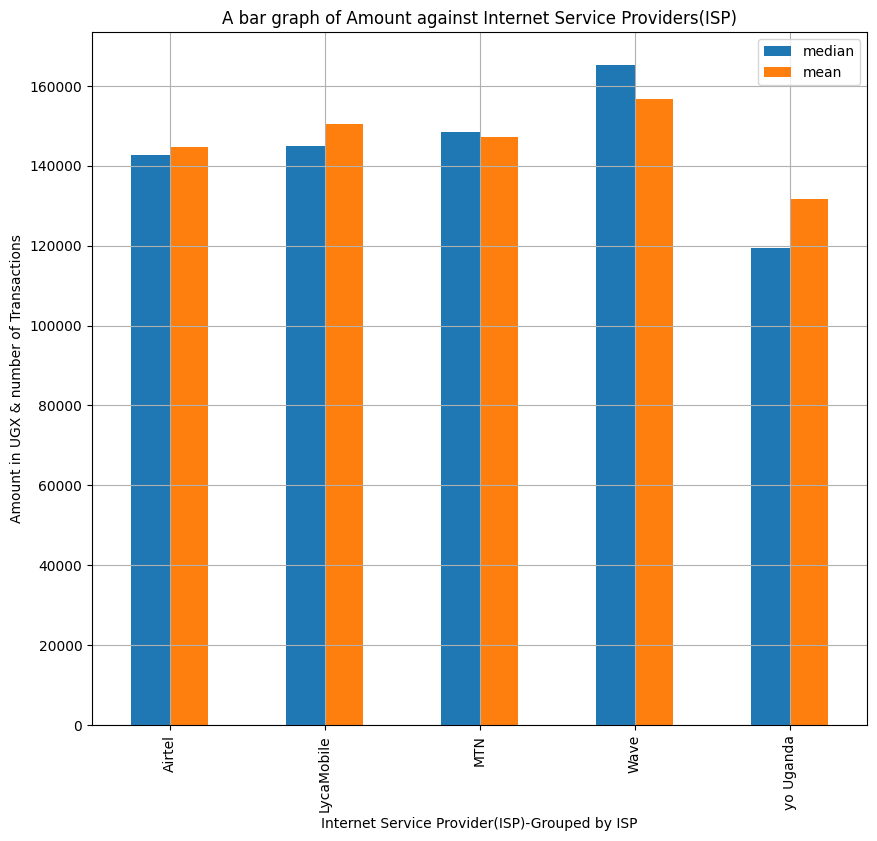


Plotting Amount(Sum) against Data grouped by Date and ISP


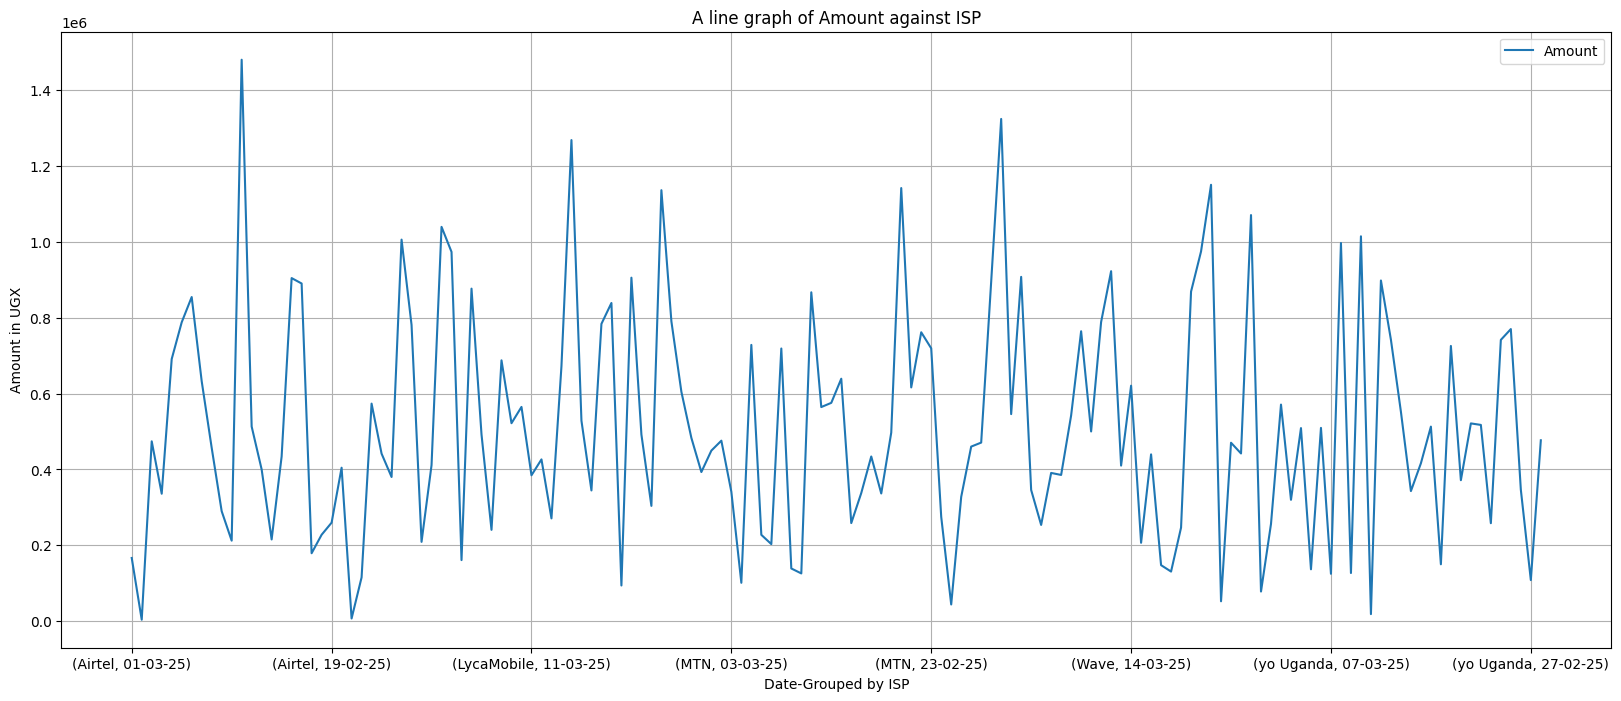

\Plotting Amount(median,mean,min,max,count) against Data grouped by and ISP


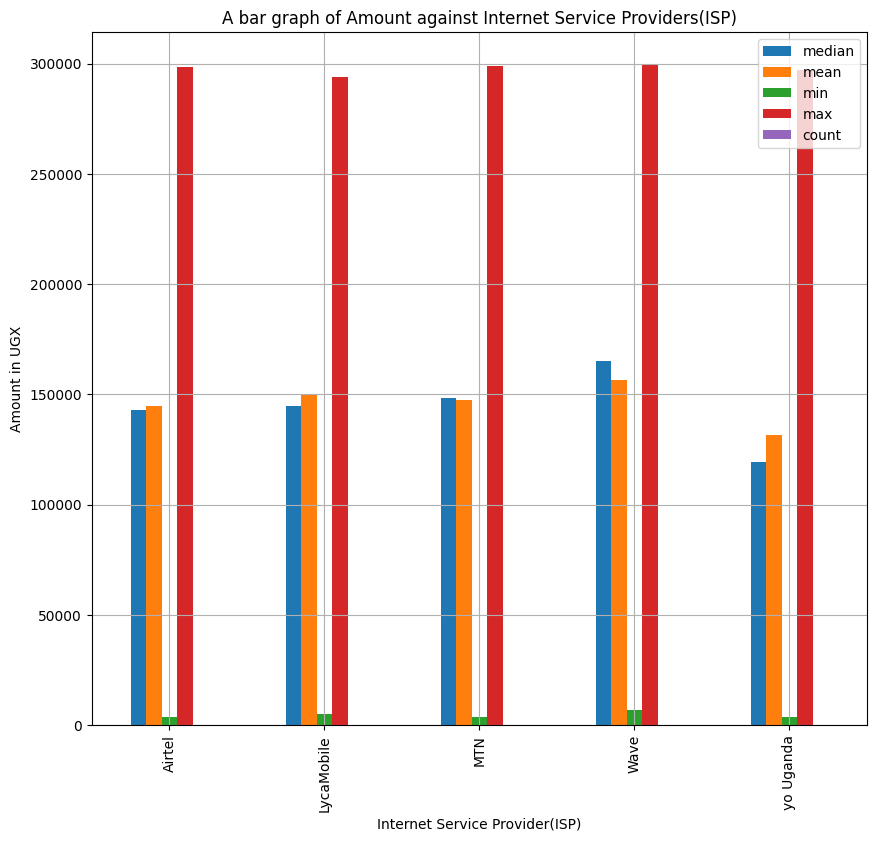

\Plotting Line graph Amount(median,mean,min,max,count) against Data grouped by and ISP


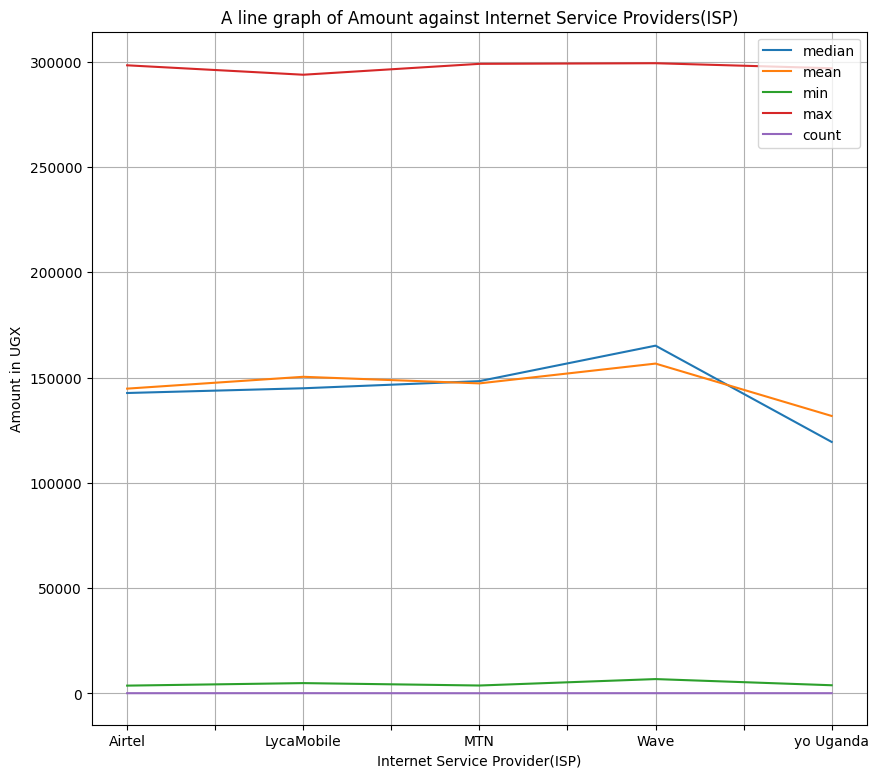

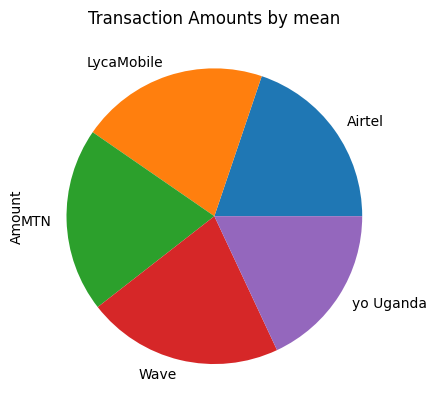

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fintech_data.csv')
#print(df.head(50))
#making the table have its index start from 1 instead of 0
data = {
    'Transanction_ID': range(1, len(df) + 1),
    'Date': df['Date'],
    'ISP': df['ISP'],
    'Amount': df['Amount']
}
df = pd.DataFrame(data)
df = df.set_index('Transanction_ID')
#print(df.head(50))
#checking for missing values
print('\nCheck for missing Values and add them')
print(df.isnull().sum())
print('\nChecking/Verifying data types for columns')
print(df.dtypes)
#filling in the category basing on amount
def transaction_status(amount):
  if amount > 150000:
    return 'High'
  elif amount > 50000:
    return 'Medium'
  else:
    return 'Low'
df['Category'] = [transaction_status(amount) for amount in df['Amount']]
#Dispplaying the first 40 rows
print('\nFirst 12 rows')
print(df.head(12))
#Performing aggregate calculations
print('\nCalculating median, mean, min, max, and count by category')
print(df.groupby('ISP')['Amount'].agg(['median','mean', 'min', 'max', 'count', 'sum']))

print('\nDaily Transactions')
print(df.groupby('Date')['Amount'].agg(['sum','count']))

print('\nVisualising the fintech information using graphs')
print('\nBar graph ploting the first 20 rows')
df = df.set_index('ISP')
df['Amount'].head(20).plot(kind = 'bar', title = 'A bar graph of Amount against Internet Service Providers(ISP)',figsize = (10,9),legend = True)
plt.ylabel('Amount in UGX')
plt.xlabel('Internet Service Provider(ISP)')
plt.grid(True)
plt.show()

print('\nBargraph plotting Amount against grouped ISP')
df.groupby('ISP')['Amount'].agg(['median','mean']).plot(kind = 'bar', title = 'A bar graph of Amount against Internet Service Providers(ISP)',figsize = (10,9),legend = True)
plt.ylabel('Amount in UGX & number of Transactions')
plt.xlabel('Internet Service Provider(ISP)-Grouped by ISP')
plt.grid(True)
plt.show()

print('\nPlotting Amount(Sum) against Data grouped by Date and ISP')
df.groupby(['ISP','Date'])['Amount'].sum().plot(kind = 'line', title = 'A line graph of Amount against ISP',figsize = (20,8),legend = True)
plt.ylabel('Amount in UGX')
plt.xlabel('Date-Grouped by ISP')
plt.grid(True)
plt.show()

print('\Plotting Amount(median,mean,min,max,count) against Data grouped by and ISP')
df.groupby('ISP')['Amount'].agg(['median','mean', 'min', 'max', 'count']).plot(kind = 'bar', title = 'A bar graph of Amount against Internet Service Providers(ISP)',figsize = (10,9),legend = True)
plt.ylabel('Amount in UGX')
plt.xlabel('Internet Service Provider(ISP)')
plt.grid(True)
plt.show()

print('\Plotting Line graph Amount(median,mean,min,max,count) against Data grouped by and ISP')
df.groupby('ISP')['Amount'].agg(['median','mean', 'min', 'max', 'count']).plot(kind = 'line', title = 'A line graph of Amount against Internet Service Providers(ISP)',figsize = (10,9),legend = True)
plt.ylabel('Amount in UGX')
plt.xlabel('Internet Service Provider(ISP)')
plt.grid(True)
plt.show()

df.groupby('ISP')['Amount'].mean().plot(kind='pie', title="Transaction Amounts by mean")
plt.show()